In [1]:
"""
In order to run the code as is, you will need scipy, pandas and tqdm installed 
(although tqdm is only needed for the progress bar, and pandas is only for the autocorrelation function)
All of these can be installed (on linux) from the command interface using 'pip'
""" 

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from gibbsrank import gibbs_sample
from eprank import eprank
import pandas
from cw2 import sorted_barplot

We first need to load the data, stored in "tennis_data.mat". The data consists of an array, $W$ containing the names of each player, and an array, G, containing the results of all of the matches in the season. 

In [2]:
# set seed for reproducibility
np.random.seed(0)
# load data
data = sio.loadmat('tennis_data.mat')
# Array containing the names of each player
W = data['W']
# loop over array to format more nicely
for i, player in enumerate(W):
    W[i] = player[0]
# Array of size num_games x 2. The first entry in each row is the winner of game i, the second is the loser
G = data['G'] - 1
# Number of players
M = W.shape[0]
# Number of Games
N = G.shape[0]

# Task A - Gibbs Sampling

In [13]:
# number of iterations
num_iters = 1100
# perform gibbs sampling, skill samples is an num_players x num_samples array
skill_samples = gibbs_sample(G, M, num_iters)#, random_nums)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1100/1100 [00:43<00:00, 25.15it/s]


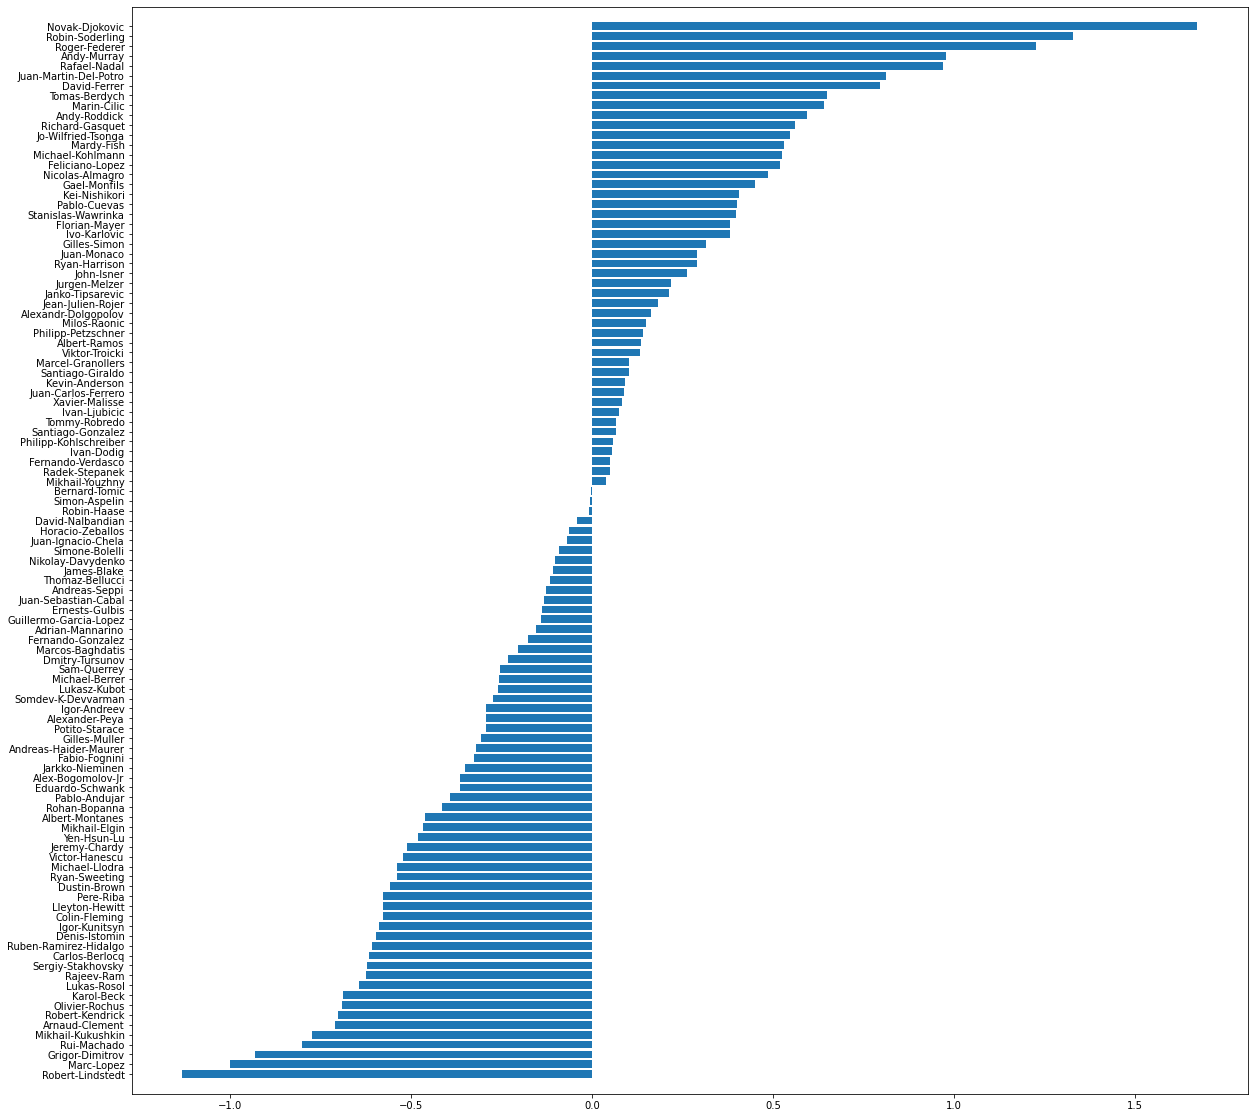

In [27]:
sorted_barplot(skill_samples[:,num_iters-1], W)

In [101]:
W_list = W.tolist()
for i, player in enumerate(W_list):
    player.append(i)
W_list

[['Rafael-Nadal', 0],
 ['Juan-Monaco', 1],
 ['Juan-Martin-Del-Potro', 2],
 ['Mardy-Fish', 3],
 ['Roger-Federer', 4],
 ['Jo-Wilfried-Tsonga', 5],
 ['Guillermo-Garcia-Lopez', 6],
 ['Florian-Mayer', 7],
 ['Milos-Raonic', 8],
 ['Santiago-Giraldo', 9],
 ['Andy-Murray', 10],
 ['Richard-Gasquet', 11],
 ['David-Nalbandian', 12],
 ['Gilles-Muller', 13],
 ['Andy-Roddick', 14],
 ['Novak-Djokovic', 15],
 ['Fernando-Verdasco', 16],
 ['Ivan-Dodig', 17],
 ['Ryan-Sweeting', 18],
 ['Radek-Stepanek', 19],
 ['John-Isner', 20],
 ['Pablo-Andujar', 21],
 ['Ivan-Ljubicic', 22],
 ['Robin-Soderling', 23],
 ['Feliciano-Lopez', 24],
 ['Marin-Cilic', 25],
 ['Marcos-Baghdatis', 26],
 ['Michael-Llodra', 27],
 ['Gael-Monfils', 28],
 ['David-Ferrer', 29],
 ['Jarkko-Nieminen', 30],
 ['Kei-Nishikori', 31],
 ['Alexandr-Dolgopolov', 32],
 ['Tomas-Berdych', 33],
 ['Somdev-K-Devvarman', 34],
 ['Ivo-Karlovic', 35],
 ['Olivier-Rochus', 36],
 ['Bernard-Tomic', 37],
 ['Karol-Beck', 38],
 ['Ernests-Gulbis', 39],
 ['Nikolay-Davy

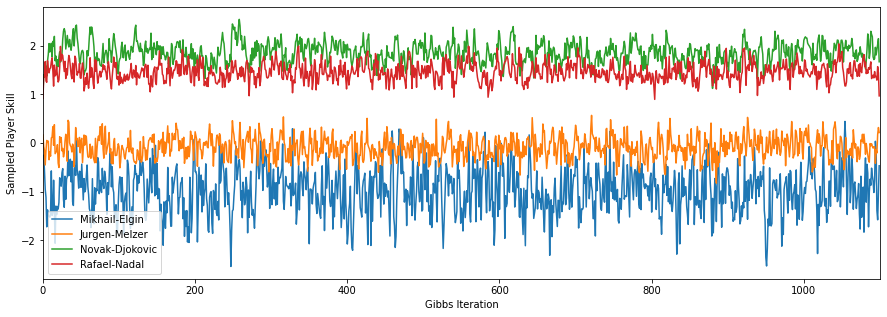

In [59]:
players = [104, 76, 15, 0]
plt.figure(figsize=(15,5))
for p in players:
    plt.plot(skill_samples[p,0:num_iters])

plt.xlim(0, num_iters)
plt.xlabel("Gibbs Iteration")
plt.ylabel("Sampled Player Skill")
plt.legend(W[players][:,0])

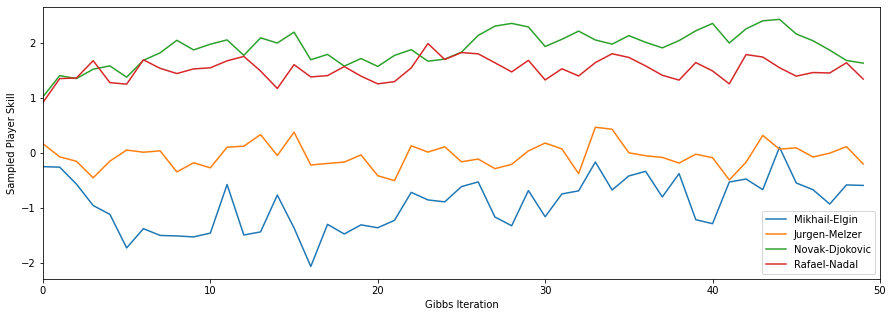

In [58]:
players = [104, 76, 15, 0]
plt.figure(figsize=(15,5))
for p in players:
    plt.plot(skill_samples[p,0:50])

plt.xlim(0, 50)
plt.xlabel("Gibbs Iteration")
plt.ylabel("Sampled Player Skill")
plt.legend(W[players][:,0])

Text(0, 0.5, 'Autocorrelation')

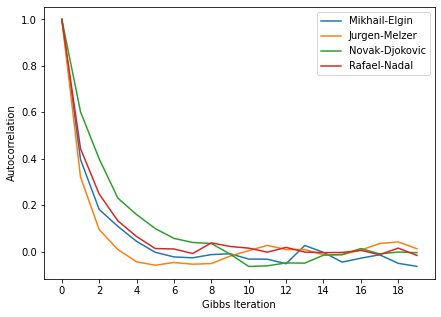

In [95]:
# Code for plotting the autocorrelation function for player p
num_vals = 20
plt.figure(figsize=(7,5))
for p in players:
    autocor = np.zeros(num_vals)
    for i in range(num_vals):
        autocor[i]=pandas.Series.autocorr(pandas.Series(skill_samples[p,:]),lag=i)
    plt.plot(autocor)
plt.legend(W[players][:,0])
plt.xticks(np.arange(0,20,2))
plt.xlabel('Gibbs Iteration')
plt.ylabel('Autocorrelation')

# Task B - EP ranking

In [89]:
mean_over_iterations = []
precision_over_iterations = []
for i in range(20):
    # run message passing algorithm, returns mean and precision for each player
    mean_player_skills, precision_player_skills = eprank(G, M, i+1)
    mean_over_iterations.append(mean_player_skills)
    precision_over_iterations.append(precision_player_skills)
mean_over_iterations = np.array(mean_over_iterations)
precision_over_iterations = np.array(precision_over_iterations)

In [86]:
mean_over_iterations[:,0]

array([0.        , 0.96325043, 1.20659154, 1.28178071, 1.31513284,
       1.33572573, 1.35076054, 1.36305172, 1.37370227, 1.38317032,
       1.39167402, 1.39934327, 1.40627113, 1.41253321, 1.41819486,
       1.42331409, 1.427943  , 1.43212858, 1.43591327, 1.43933546])

Text(0, 0.5, 'Player Skill Mean')

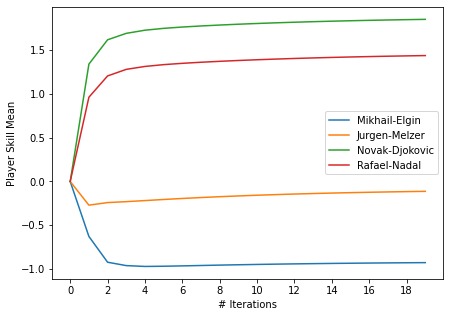

In [96]:
num_vals = 20
plt.figure(figsize=(7,5))
for p in players:
    plt.plot(mean_over_iterations[:,p])
plt.legend(W[players][:,0])
plt.xticks(np.arange(0,20,2))
plt.xlabel('# Iterations')
plt.ylabel('Player Skill Mean')

Text(0, 0.5, 'Player Skill Precision')

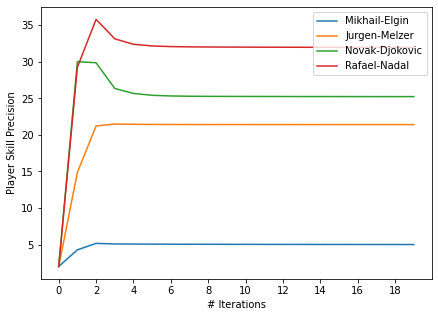

In [97]:
num_vals = 20
plt.figure(figsize=(7,5))
for p in players:
    plt.plot(precision_over_iterations[:,p])
plt.legend(W[players][:,0])
plt.xticks(np.arange(0,20,2))
plt.xlabel('# Iterations')
plt.ylabel('Player Skill Precision')

# Task C

Top four players from ATP ranking (lecture notes):
- Djokovic ~ 15
- Nadal ~ 0
- Federer ~ 4
- Murray ~ 10

In [109]:
from scipy.stats import norm

top_four = [15, 0, 4, 10]

burn_in = 0
num_iters = 1100
thinning = 1

indices = np.array(range(burn_in, num_iters, thinning))

selected_samples = np.zeros((4, len(indices)))

for idx, p in enumerate(top_four):
    selected_samples[idx] = skill_samples[p, indices]

prob_better_player = np.zeros((4, 4))
print(W[top_four])
for i in range(0, 4):
    for j in range(0, 4):

        skill_diff = np.mean(selected_samples[i] - selected_samples[j])
        var = np.sum(np.cov(selected_samples[i], -selected_samples[j]))
        prob_better_player[i, j] = norm.cdf(skill_diff / np.sqrt(var))

print(prob_better_player)

[['Novak-Djokovic']
 ['Rafael-Nadal']
 ['Roger-Federer']
 ['Andy-Murray']]
[[       nan 0.94705698 0.90060748 0.98559994]
 [0.05294302        nan 0.39839786 0.77257234]
 [0.09939252 0.60160214        nan 0.82007256]
 [0.01440006 0.22742766 0.17992744        nan]]


C:\Users\jeeva\AppData\Local\Temp\ipykernel_26452\1728966051.py:23: RuntimeWarning: invalid value encountered in double_scalars
  prob_better_player[i, j] = norm.cdf(skill_diff / np.sqrt(var))


In [117]:
def prob_skill_higher(p1,p2,means,pres,performance=0):
    #probability that s1>s2 = p(s1-s2>0) let z=s1-s2 , z~(m1-m2,v1+v2)
    p1=int(p1)
    p2=int(p2)
    mean = means[p1]-means[p2]
    var = 1/pres[p1] + 1/pres[p2] + performance
    prob = 1 - norm.cdf((0-mean)/(var**0.5))
    return prob

In [122]:
t1 = np.zeros((4,4))
for col in range(4):
    for row in range(4):
        t1[row,col] = prob_skill_higher(top_four[col],top_four[row],mean_player_skills, precision_player_skills) ## prob that col beats row
print(t1)

[[0.5        0.05996734 0.09103778 0.01470312]
 [0.94003266 0.5        0.57335168 0.23422356]
 [0.90896222 0.42664832 0.5        0.18945617]
 [0.98529688 0.76577644 0.81054383 0.5       ]]


In [123]:
t1 = np.zeros((4,4))
for col in range(4):
    for row in range(4):
        t1[row,col] = prob_skill_higher(top_four[col],top_four[row],mean_player_skills, precision_player_skills,1) ## prob that col beats row
print(t1)

[[0.5        0.34451329 0.36196938 0.28029164]
 [0.65548671 0.5        0.51847798 0.42715481]
 [0.63803062 0.48152202 0.5        0.40925999]
 [0.71970836 0.57284519 0.59074001 0.5       ]]
